# Fig. 1. Data sources presented as a treemap chart, weighted according to their contribution to the researcher entity.

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.fillna(0)
    
    
    return filtered_df

#### Define researchers data path

In [2]:
file_path = "../data/mapeo_investigadores.csv"

#### Define function to clean researchers data

In [3]:
def prepare_data(data, num_of_sources):
    mini = data[["ID investigador", "Fuente de información"]]
    mini = mini[mini["Fuente de información"] != 0]
    mini.columns = ["id", "fuente"]

    sources_list = mini["fuente"].tolist()
    def_list = []
    for item in sources_list:
        if "|" in item:
            comas = item.split("|")
            for element in comas:
                def_list.append(element.strip())
        else: 
            def_list.append(item.strip())
    counter = Counter(def_list).most_common(num_of_sources)
    sources_dict = dict(counter)
    # Change sources string to acronym
    acronimos = pd.read_csv("../data/fuentes.csv", sep=";")
    acronimos = acronimos.set_index('Fuente de información')
    acronimos_dict = acronimos.T.to_dict('records')
    acronimos_dict = acronimos_dict[0]
    # new dict with acronyms
    corrected_dict = {}
    for key, value in sources_dict.items():
        corrected_dict.update({ acronimos_dict.get(key, "No especificado"): value }) 
    return corrected_dict, sources_dict

#### Run program
## Change 'num_of_sources' to show as many disciplinary backgrounds as you want'

In [4]:
num_of_sources = 20
investigadores = read_csv(file_path)
corrected_dict, sources_dict = prepare_data(investigadores, num_of_sources)

#### Print treemap

In [5]:
import squarify

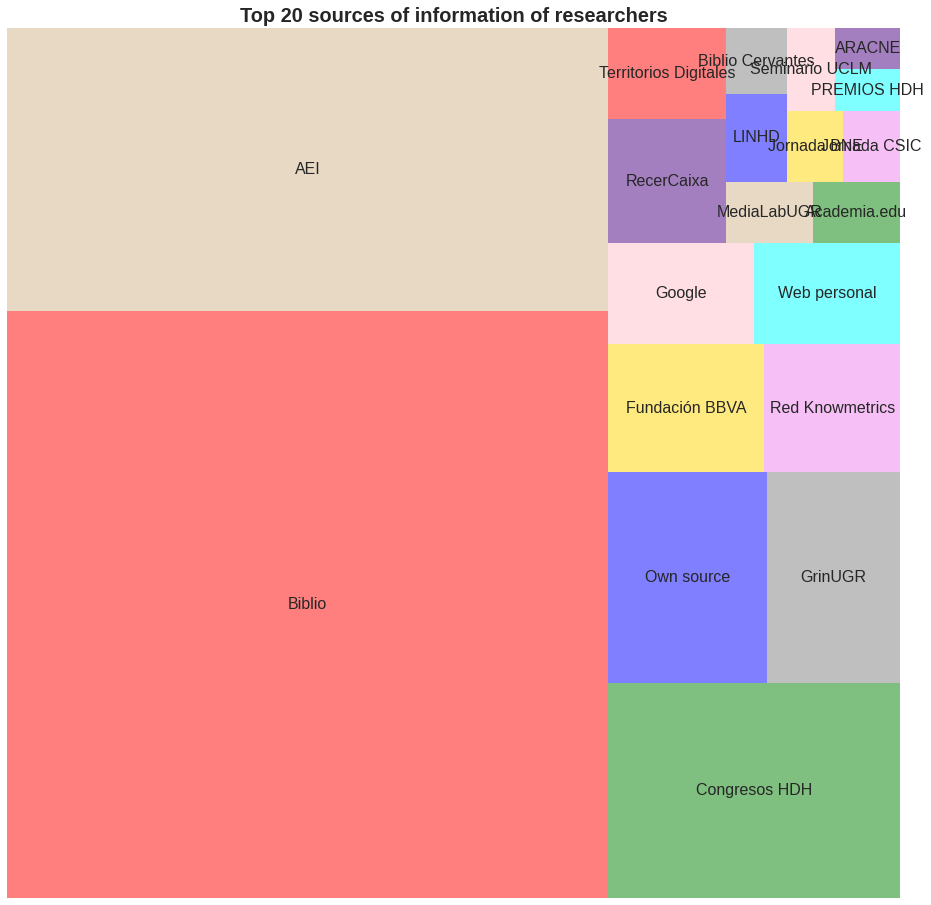

In [6]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
colors = ["red", "tan", "green", "blue", "grey", "gold", "violet", "pink", "cyan", "indigo"]
squarify.plot(sizes=corrected_dict.values(), label=corrected_dict.keys(), color=colors, alpha=.5, 
              text_kwargs={'fontsize':16})
plt.title(f"Top {num_of_sources} sources of information of researchers",fontsize=20,fontweight="bold")

plt.axis('off')
plt.show() 

# Print table

In [7]:
sources_table = pd.DataFrame.from_dict(sources_dict, orient='index')
sources_table

,0
Bibliografía,264
Agencia Estatal de Investigación,127
Congresos HDH,47
Fuente propia,25
GrinUGR,21
Fundación BBVA,15
Red Knowmetrics,13
Google,11
Web personal,11
RecerCaixa,11
